<a href="https://colab.research.google.com/github/kzielins/ML_courses/blob/main/06_TF_keras_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# digits
based on : https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_recognition_neural_network.ipynb

Video : https://www.youtube.com/watch?v=iqQgED9vV7k&t=496s
Video Simple explanation of convolutional neural network | Deep Learning Tutorial 23 (Tensorflow & Python) : https://www.youtube.com/watch?v=zfiSAzpy9NM


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [55]:
print( len(X_train))
print(len(X_test))

60000
10000


In [56]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

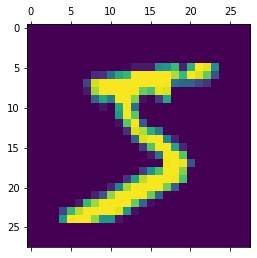

In [58]:
plt.matshow(X_train[0])

In [59]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

In [61]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [62]:
X_train_flattened.shape


(60000, 784)

Simple nn ![image.png](
https://github.com/codebasics/
deep-learning-keras-tf-tutorial/raw/9a394a6a82e503d5e0c8470d7d6a90c1d17d3f67/1_digits_recognition/digits_nn.jpg
  )

In [103]:
model = keras.Sequential([
    keras.layers.Dense(10,activation='sigmoid') 
      ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
#              loss='mean_squared_error',
              metrics=['accuracy'] 
              )
model.fit(X_train_flattened,y_train,epochs=5
          #,batch_size=3000
          )

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7098 - accuracy: 0.8170
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3103 - accuracy: 0.9122
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2876 - accuracy: 0.9191
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2749 - accuracy: 0.9221
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2631 - accuracy: 0.9264


In [104]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.9249


[0.26666387915611267, 0.9248999953269958]

In [105]:
y_predicted=model.predict(X_test_flattened)
print(y_predicted[1])
print(np.argmax(y_predicted[1]))

[3.6312687e-01 4.1721761e-03 9.9914354e-01 2.7577907e-01 3.8113479e-10
 8.6864895e-01 9.0152985e-01 7.9415039e-13 1.6021022e-01 2.4569324e-09]
2


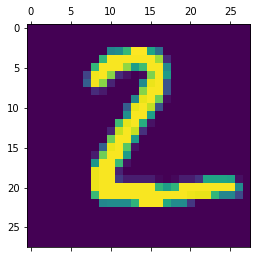

In [106]:
plt.matshow(X_test[1])

In [107]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [108]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   8,   12,  910,   17,    6,    5,   13,   10,   47,    4],
       [   4,    0,   17,  917,    0,   27,    2,   11,   24,    8],
       [   1,    1,    3,    2,  904,    0,   12,    4,   10,   45],
       [   9,    2,    1,   28,    7,  786,   15,    4,   33,    7],
       [  11,    3,    4,    1,    7,   13,  913,    2,    4,    0],
       [   1,    5,   20,    8,    7,    0,    0,  943,    4,   40],
       [   6,    6,    6,   18,    9,   27,    8,    9,  878,    7],
       [  10,    7,    1,    9,   24,    6,    0,   16,    9,  927]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

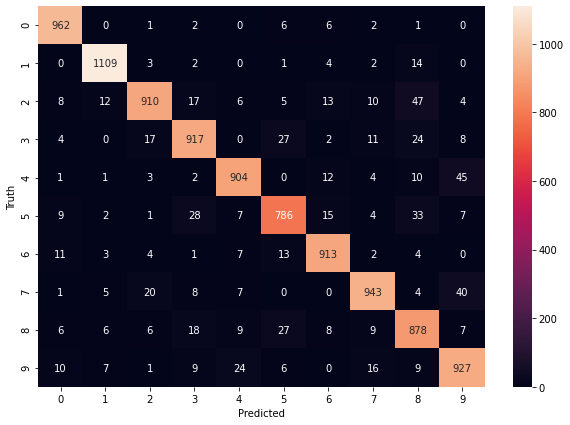

In [109]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [110]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') 
      ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
#              loss='mean_squared_error',
              metrics=['accuracy'] 
              )
model.fit(X_train_flattened,y_train,epochs=5
          #,batch_size=3000
          )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4418 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1323 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9860


In [112]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9765


[0.0799296423792839, 0.9764999747276306]

In [115]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') 
      ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
#              loss='mean_squared_error',
              metrics=['accuracy'] 
              )
model.fit(X_train,y_train,epochs=5
          #,batch_size=3000
          )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4617 - accuracy: 0.8718
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9849


In [120]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8983


[0.39938855171203613, 0.8982999920845032]

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') 
      ])
model.compile(
    optimizer='Adam',
 #   optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
 #             loss='mean_squared_error',
              metrics=['accuracy'] 
              )
model.fit(X_train,y_train,epochs=5
          #,batch_size=3000
          )
model.evaluate(X_test,y_test)